# Proyecto: Actitudes hacia el Estado del bienestar en jóvenes en España

Este notebook presenta un proyecto sencillo de análisis de datos simulados sobre actitudes hacia el Estado del bienestar en España,
comparando a jóvenes de la Generación Z con la generación inmediatamente anterior.

El objetivo es ilustrar, de forma simple, cómo podría abordarse un análisis de datos sociales digitales/cuestionarios utilizando Python y herramientas básicas de ciencia de datos.


In [1]:
# Importamos librerías básicas y generamos un pequeño conjunto de datos SIMULADOS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



np.random.seed(42)

n = 1000

# Generamos datos simulados
edades = np.random.randint(18, 40, size=n)

# Definimos generación aproximada: Gen Z (18-27), generación anterior (28-39)
generacion = np.where(edades <= 27, "Gen Z", "Gen anterior")

# Orientación política en escala 1-10 (1 = izquierda, 10 = derecha)
# Simulamos ligera mayor puntuación de derecha en Gen Z (solo como ejemplo de análisis)
orientacion_politica = []
for g in generacion:
    if g == "Gen Z":
        orientacion_politica.append(np.clip(np.random.normal(loc=6, scale=1.5), 1, 10))
    else:
        orientacion_politica.append(np.clip(np.random.normal(loc=5.5, scale=1.5), 1, 10))

orientacion_politica = np.round(orientacion_politica, 1)

# Apoyo al Estado del bienestar (1-10, 1 = nada de apoyo, 10 = apoyo muy fuerte)
# Simulamos ligero menor apoyo medio en Gen Z
apoyo_bienestar = []
for g, op in zip(generacion, orientacion_politica):
    base = 8 - (op - 5) * 0.4
    if g == "Gen Z":
        base = base - 0.3
    apoyo_bienestar.append(np.clip(np.random.normal(loc=base, scale=1.2), 1, 10))

apoyo_bienestar = np.round(apoyo_bienestar, 1)

# Percepción de sostenibilidad de la Seguridad Social (1-10, 1 = nada sostenible, 10 = muy sostenible)
percepcion_seg_social = []
for g in generacion:
    if g == "Gen Z":
        percepcion_seg_social.append(np.clip(np.random.normal(loc=4.5, scale=1.5), 1, 10))
    else:
        percepcion_seg_social.append(np.clip(np.random.normal(loc=5.2, scale=1.5), 1, 10))

percepcion_seg_social = np.round(percepcion_seg_social, 1)

# Construimos el DataFrame
df = pd.DataFrame({
    "edad": edades,
    "generacion": generacion,
    "orientacion_politica": orientacion_politica,
    "apoyo_bienestar": apoyo_bienestar,
    "percepcion_seg_social": percepcion_seg_social
})

print(df.head())


   edad    generacion  orientacion_politica  apoyo_bienestar  \
0    24         Gen Z                   4.7              7.3   
1    37  Gen anterior                   4.9              7.4   
2    32  Gen anterior                   6.3              8.2   
3    28  Gen anterior                   7.4              6.5   
4    25         Gen Z                   7.4              8.0   

   percepcion_seg_social  
0                    6.4  
1                    6.7  
2                    4.9  
3                    8.4  
4                    4.9  


In [2]:
# Análisis descriptivo básico por generación
print(df.groupby("generacion")[["orientacion_politica", "apoyo_bienestar", "percepcion_seg_social"]].mean())

print("Descripción general de las variables numéricas:")
print(df.describe())


              orientacion_politica  apoyo_bienestar  percepcion_seg_social
generacion                                                                
Gen Z                     5.988323         7.224416               4.429299
Gen anterior              5.452363         7.803970               5.285822
Descripción general de las variables numéricas:
              edad  orientacion_politica  apoyo_bienestar  \
count  1000.000000           1000.000000      1000.000000   
mean     28.231000              5.704800         7.531000   
std       6.538378              1.504454         1.310174   
min      18.000000              1.000000         2.700000   
25%      22.000000              4.600000         6.600000   
50%      28.000000              5.700000         7.500000   
75%      34.000000              6.700000         8.500000   
max      39.000000             10.000000        10.000000   

       percepcion_seg_social  
count            1000.000000  
mean                4.882400  
std      

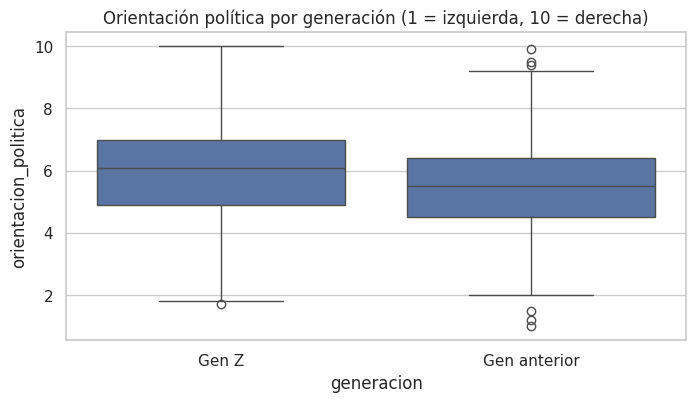

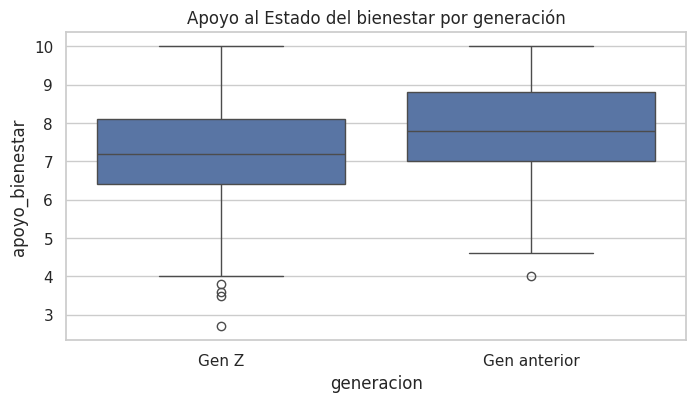

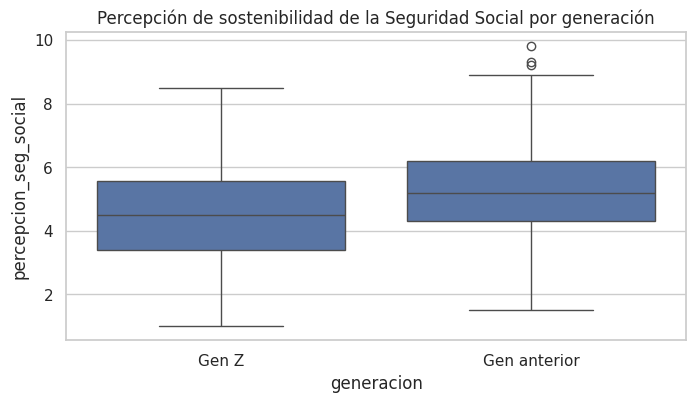

In [3]:
# Visualizaciones sencillas para comparar generaciones
sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="generacion", y="orientacion_politica")
plt.title("Orientación política por generación (1 = izquierda, 10 = derecha)")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="generacion", y="apoyo_bienestar")
plt.title("Apoyo al Estado del bienestar por generación")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="generacion", y="percepcion_seg_social")
plt.title("Percepción de sostenibilidad de la Seguridad Social por generación")
plt.show()


## Interpretación breve (con datos simulados)

Este análisis es puramente ilustrativo, ya que los datos han sido generados de forma simulada.
Aun así, el ejemplo muestra cómo podría abordarse una comparación entre generaciones en términos de:

- Orientación política.
- Apoyo al Estado del bienestar.
- Percepción de la sostenibilidad de la Seguridad Social.

La idea para un proyecto real sería sustituir estos datos simulados por:

- Datos de encuestas reales (CIS u otras fuentes).
- O bien datos de redes sociales etiquetados por edad/generación a tarves de tecncias avanzadas como webscrapping. 

A partir de ahí, se podría profundizar con técnicas más avanzadas de ciencia de datos aplicada a las ciencias sociales.
